# General Analysis

In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
%run -i ../../tools/label_encoder.py

# Estadisticos y Errores
# Metrics
The metric that will be taken into account is the [MAE: Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error), that's the average of the absolute differences between the prediction and the real value.  
In this case this metric will be in the range of [0, 100]

* MAE: Mean Absolute Error / MAD: Mean Absolute Differences

The form of the metric is the following:

Metric = $\frac{\sum|Y.Real-Y.Prediction|}{n}$  

Knowing that ***n*** is the shape of the target.

In [30]:
def MAD(Y, YP): #MAE - MEAN ABSOLUTE ERROR... BY ME
    """Returns the mean loss"""
    m = np.mean(abs(Y-YP))
    return m

In [31]:
def plot_predictions_KF(Model, target, X, Y, kf): #PERFECT FUNCTION - DECIDED IF LET IT GET THE SCORES OR NOT
    """Required the Model/Estimator
    The target
    X is the predictive features
    Y is the data that contains all the TARGETS
    and kf is the object of Kfolds
    Returns the Mean Score and the Plots(of each KFold) with the individual score"""
    plot_rows = int(np.ceil(len(kf)/3)) #Number of rows to plot
    fig, axes = plt.subplots(plot_rows, 3, sharex=False, figsize=(14, plot_rows*4))
    axs = [i for i in axes.flatten()]
    sc = []
    j = 0
    for n, i in (kf):
        ax = axs[j]
        Model.fit(X.iloc[n], Y[target].iloc[n])
        Y_pred = Model.predict(X.iloc[i])
        ##################PRUEBA, QUITANDO LOS OUTLIERS EXAGERADOS###############
        #ind = (Y_pred > 0) & (Y_pred < 100)
        #Y_pred2 = Y_pred[ind] 
        score = MAD(Y[target].iloc[i], Y_pred) #HERE THE MAE IS CALCULATED
        ########################################################################
        ax.plot(Y[target].iloc[i], Y_pred, 'go', label='Prediction')
        #ax.plot(Y[target].iloc[i], Y[target].iloc[i]) #RECTA DE REGRESION PERFECTA
        ax.set_title('Fold: '+str(j)+'. Score: '+str(score))
        ax.set_xlabel('Real_Value')
        ax.set_ylabel('Prediction')
        ax.legend()
        j += 1
        sc.append(score)
        ax.grid()
    print('Mean Score:', np.mean(sc))
    plt.tight_layout(h_pad=2)

In [32]:
def get_exp_prediction(estimator, exp, S_Data, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the estimator
    The exponent
    The sorted data by values of the target to predict
    The column(target) that will be analyzed
    The number of folds that will be created
    KFShuffle if True the Kfolds shuffle the data before split it
    shuffle_split if True the function DON'T use Kfolds, instead use a ShuffleSplit object
    And return the score of the model, and the plot of the prediction"""
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = S_Data.columns.difference(y_list)
    New_X = S_Data.filter(items = X_list)
    exped_X = New_X**exp
    Y_train = S_Data.filter(items = y_list)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = exped_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(exped_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    print('The Model with the Data raised to the power of', exp, 'gives:')
    plot_predictions_KF(estimator, target, exped_X, Y_train, kf)

In [33]:
def get_Poly_prediction(estimator, deg, D_sorted, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the degree to the PolynomialFeature object and the sorted data by values of the target,
    return the score of the model, statistics and the plots of the prediction"""
    start_time = time()
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = D_sorted.columns.difference(y_list)
    New_X = D_sorted.filter(items = X_list)
    Y_train = D_sorted.filter(items = y_list)
    
    Poly = PolynomialFeatures(degree = deg)
    Poly_X = Poly.fit_transform(New_X)
    Poly_X = pd.DataFrame(Poly_X)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(Poly_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    
    print('The Model with the new "PolyData" with degree', deg, 'gives:')
    plot_predictions_KF(estimator, target, Poly_X, Y_train, kf)
    print('The prediction took:', time()-start_time, 'seconds')

## <span style='color: blue'>The Above functions will be pasted into the predictive_functions.py file in the tools directory</span>

### File of the year 2000

In [31]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter = ';')

In [35]:
data_2000.shape

(77508, 53)

In [36]:
data_2000 = label_encoder(data_2000)

In [37]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)

In [38]:
X = data_2000.filter(items=X_list)
Y = data_2000.filter(items=y_list)

## TREATMENT OF THE MULTICOLLINEARITY TO THE FIRST FILE

We can see that the SUBJECT's Scores are related to this other columns
* ['FAMI_INGRESO_FMILIAR_MENSUAL', 'FAMI_INGRESO_FMILIAR_MENSUAL', 'FAMI_EDUCA_PADRE', 'FAMI_EDUCA_PADRE']

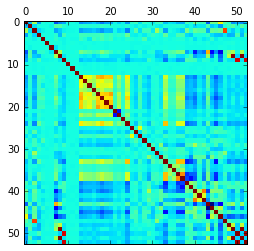

In [8]:
plt.matshow(data_2000.corr())

In [9]:
correl = data_2000.corr()

In [10]:
correl.iloc[33:37, 30:36]

,FAMI_VIVIENDA_PROPIA,FAMI_DEUDA_VIVIENDA,FAMI_APORTANTES,FAMI_INGRESO_FMILIAR_MENSUAL,FAMI_LEE_ESCRIBE_PADRE,FAMI_LEE_ESCRIBE_MADRE
FAMI_INGRESO_FMILIAR_MENSUAL,0.114591,0.044470,0.107332,1.000000,0.089675,0.097750
FAMI_LEE_ESCRIBE_PADRE,0.007864,0.000779,-0.009174,0.089675,1.000000,0.245365
FAMI_LEE_ESCRIBE_MADRE,0.011658,0.004436,-0.020339,0.097750,0.245365,1.000000
FAMI_EDUCA_PADRE,0.057892,0.078371,0.009244,0.525457,0.274445,0.144073


Here we can see the relations between the columns without the scores

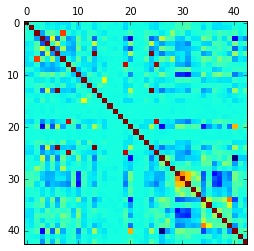

In [11]:
plt.matshow(X.corr())#, cmap='Greys_r')

In [19]:
correlation = X.corr()

In [27]:
#correlation.iloc[12:18, :6] #COLE_COD_ICFES y NACIMIENTO_ANNO
correlation.iloc[30:36, 23:29]

,FAMI_DEUDA_VIVIENDA,FAMI_EDUCA_MADRE,FAMI_EDUCA_PADRE,FAMI_INGRESO_FMILIAR_MENSUAL,FAMI_LEE_ESCRIBE_MADRE,FAMI_LEE_ESCRIBE_PADRE
FAMI_NUM_HERMANOS_EDUSUPERIOR,0.037494,0.014288,0.030979,0.080195,0.004785,0.009540
FAMI_OCUPA_MADRE,-0.055576,-0.386199,-0.250997,-0.300217,-0.065806,-0.045554
FAMI_OCUPA_PADRE,0.040984,-0.291794,-0.324735,-0.348265,-0.073053,-0.070925
FAMI_PERSONAS_HOGAR,-0.010773,-0.134019,-0.115506,-0.100899,-0.043043,-0.031921
FAMI_SOST_PERSONAL,-0.048561,0.181317,0.180975,0.105135,0.109918,0.097288
FAMI_VIVIENDA_PROPIA,-0.008218,0.074185,0.057892,0.114591,0.011658,0.007864


#### THIS CHANGES WILL BE EXECUTED IMMEDIATELY
* We see that there are correlations between the columns that has information about departments and municipalities, SO just one of each class will remain
* We see that there are correlations between the column COLE_JORNADA and COLE_BILINGUE, so COLE_JORNADA will remain, because COLE_BILINGUE had like more than 90% of NaN values, and was filled intuitively


In [39]:
data_2000.drop(['COLE_DEPTO_UBICACION', 'COLE_MCPIO_UBICACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
                'COLE_BILINGUE', 'FAMI_POSICION_HERMANOS'], axis=1, inplace=True)

In [40]:
data_2000.to_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', sep=';', index=False)

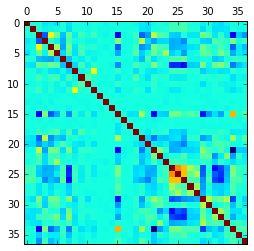

In [15]:
X = data_2000.filter(items=X_list)
Y = data_2000.filter(items=y_list)
plt.matshow(X.corr())#, cmap='Greys_r')

# Plots of the Targets

In [193]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = D_sorted.columns.difference(y_list)

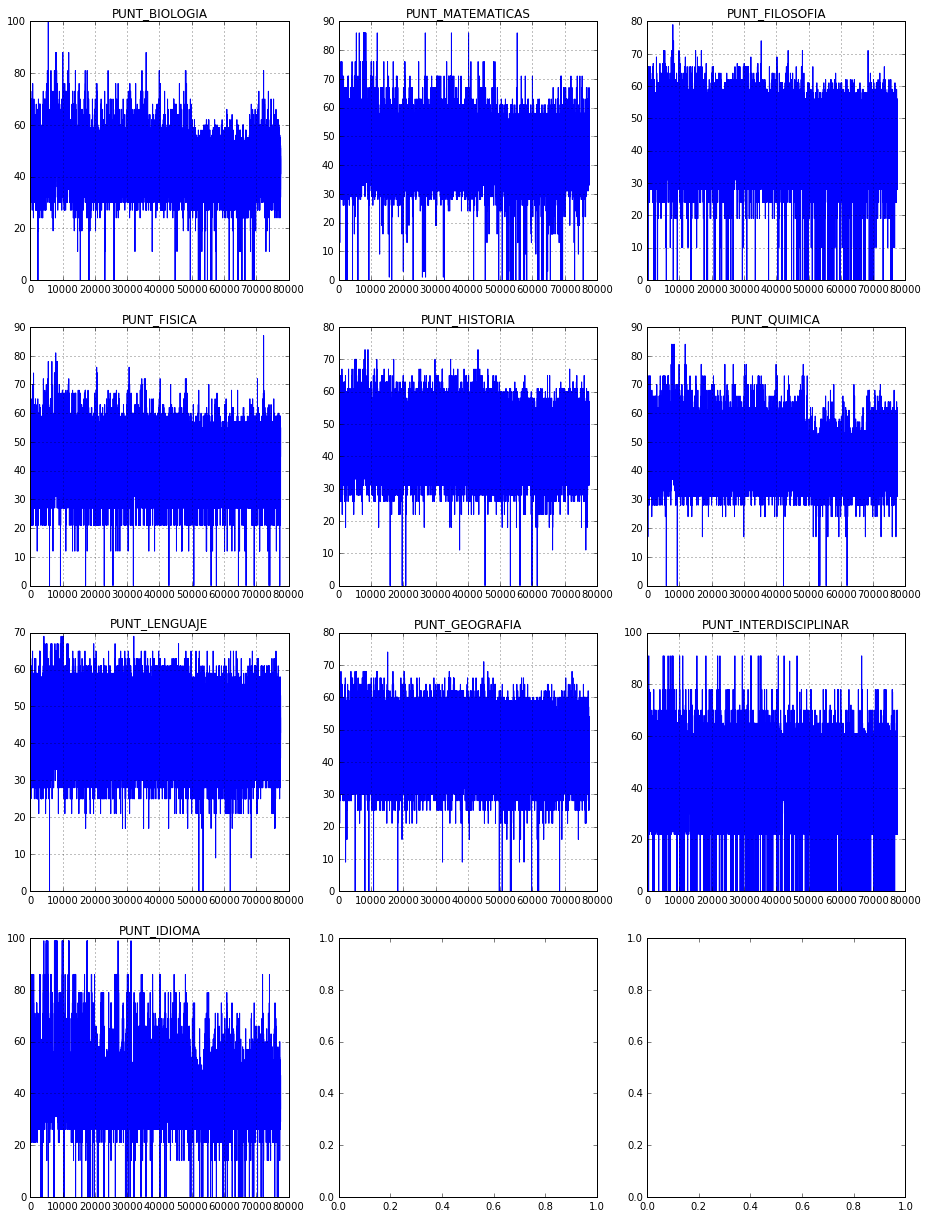

In [199]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    New_X = data_2000.filter(items = X_list)
    New_Y = data_2000.filter(items = y_list)
    ax = axs[n]
    ax.plot(range(New_Y.shape[0]), New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)

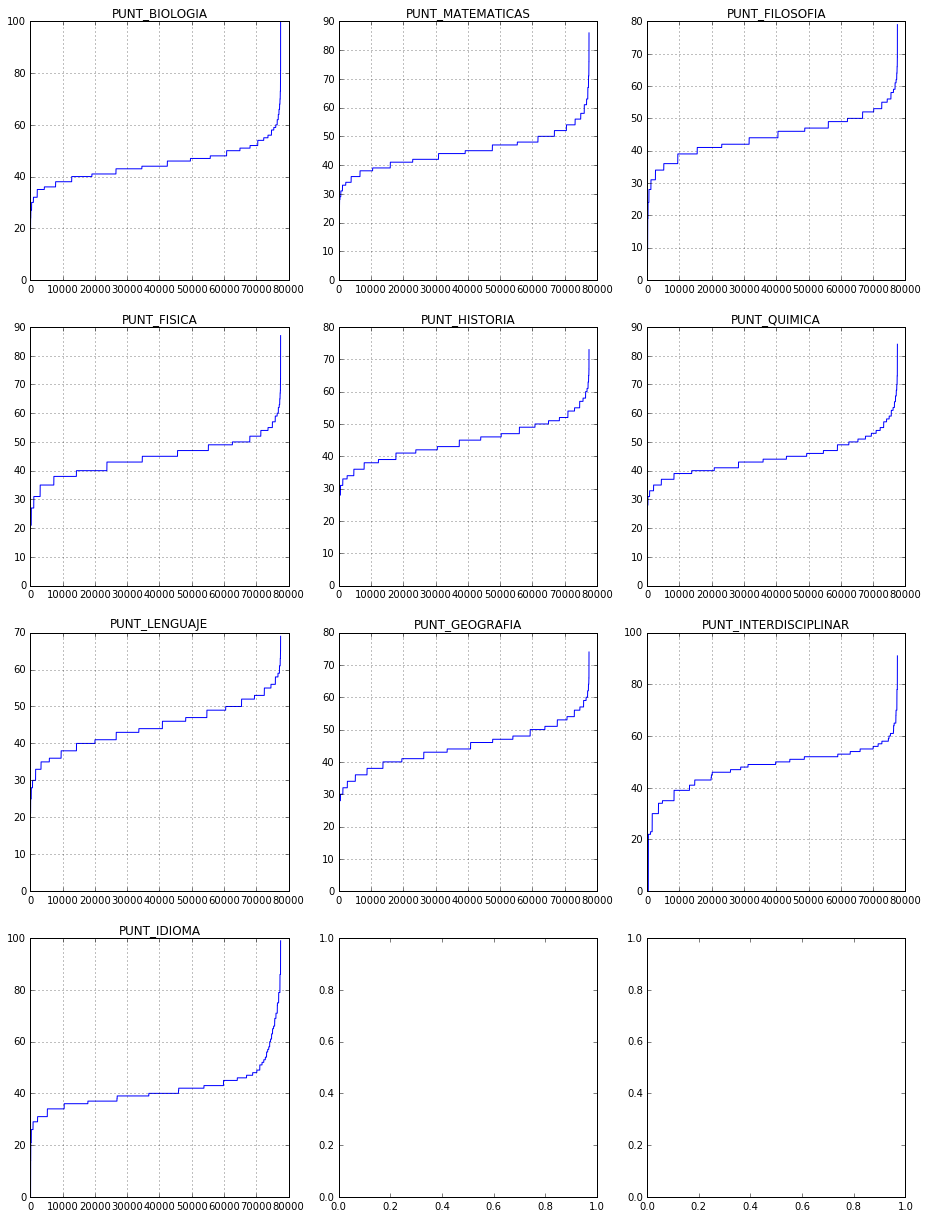

In [196]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    D_sorted = data_2000.sort_values(by=i)
    New_X = D_sorted.filter(items = X_list)
    New_Y = D_sorted.filter(items = y_list)
    #dic = Geo_Groups.get_group(i)
    ax = axs[n]
    ax.plot(range(New_Y.shape[0]), New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)

### Outliers Display

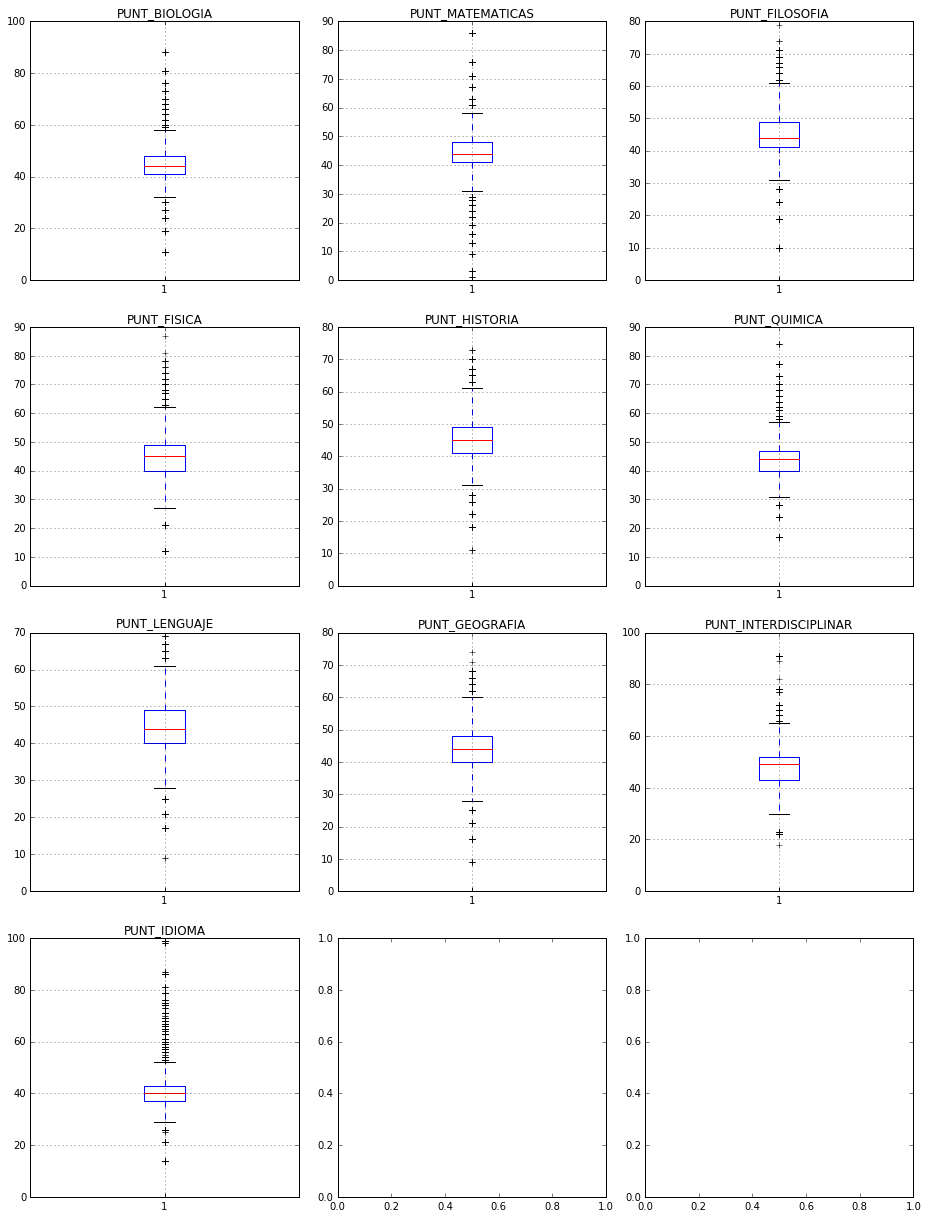

In [31]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    D_sorted = data_2000.sort_values(by=i)
    New_Y = D_sorted.filter(items = y_list)
    ax = axs[n]
    ax.boxplot(New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)